<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://------">Anna Monreale</a><br/>
<b>Python version:</b>  3.x<br/>
<b>Last update:</b> 05/01/2020
</span>


# Data Understanding & Preparation on Tips dataset 


This notebook contains an explorative analysis of the well-known **"tips dataset"** describing tips given in a restaurant on top of the bill. 

It is a common custom to offer some small extra money - a tip - to the staff of a restaurant on top of the bill after a satisfactory service received. Although the tips are voluntary, and the amount of the tips is not (usually) stated, by convention it is often advised to leave as a certain percent (e.g. 10%) of the total bill for the meal and service.

The tips dataset (being analysed in this Notebook) is a representation of tips given in a restaurant. The dataset in question is a record (allegedly real and true) of tips given along with total bills of a restaurant customers collated by a waiter working in the restaurant for several weeks.

The data is organised in a form of an array, where the dataset attributes (aka features) are organised in columns, and the observations (aka instances) - in rows. The dataset consists of several data categories describing tips received in connection to circumstances, such as day of the week, gender of the tipper, etc. The data set includes 244 data observations.

This dataset is a modified version of that one made available at the following link: https://github.com/mwaskom/seaborn-data where you can find other interesting datasets.


The **central component** of the data science toolkit is **Pandas library** is a and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.


**Install Pandas**

Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands: **conda install pandas OR pip install pandas.**

Alternatively, if you're using Jupyter notebook you can run a cell with: **!pip install pandas**


In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

ModuleNotFoundError: No module named 'matplotlib'

## Loading the data set

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [ ]:
df = pd.read_csv('tipsdata/tips-id.csv', sep='\t', index_col=0) #alternative in case of json source df.to_json('filename.json')

In [ ]:
print(df.head()) #print the first records of a df, 
print()
print(df.tail()) #print the last records of a df.

    total_bill   tip     sex smoker  day    time  size
ID                                                    
1        16.99  1.01  Female    NaN  Sun  Dinner     2
2        10.34  1.66    Male     No  Sun  Dinner     3
3        21.01  3.50    Male     No  Sun  Dinner     3
4        23.68  3.31    Male     No  Sun  Dinner     2
5        24.59  3.61  Female     No  Sun  Dinner     4

     total_bill   tip     sex smoker   day    time  size
ID                                                      
240       29.03  5.92    Male     No   Sat  Dinner     3
241       27.18  2.00  Female    Yes   Sat  Dinner     2
242       22.67  2.00    Male    Yes   Sat  Dinner     2
243       17.82  1.75    Male     No   Sat  Dinner     2
244       18.78  3.00  Female     No  Thur  Dinner     2


In [ ]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

## Types of Attributes and basic checks

Check the data integrity, that is whether there are any empty cells or corrupted data. 
We will use for this purpose the Pandas function **info()**, which checks if there is any 
null value in any column. This function also checks data type for each column, as well as 
number of each data types and number of observations (rows).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        242 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [ ]:
df.dtypes #return the type of each attribute

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

# Data Integration
We load another table containing another piece of information about any person: "the age"

In [ ]:
df_age = pd.read_csv('tipsdata/age-tips.csv', sep='\t', index_col=0) 
df_age.head()

,age,gender
ID,,
1,57,Female
2,23,Male
3,62,Male
4,0,Male
5,0,Female


In [ ]:
j_df=df.join(df_age, on='ID') #we create a new table to have the global view
j_df

,total_bill,tip,sex,smoker,day,time,size,age,gender
ID,,,,,,,,,
1,16.99,1.01,Female,NaN,Sun,Dinner,2,57,Female
2,10.34,1.66,Male,No,Sun,Dinner,3,23,Male
3,21.01,3.50,Male,No,Sun,Dinner,3,62,Male
4,23.68,3.31,Male,No,Sun,Dinner,2,0,Male
5,24.59,3.61,Female,No,Sun,Dinner,4,0,Female
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,25,Male
241,27.18,2.00,Female,Yes,Sat,Dinner,2,42,Female
242,22.67,2.00,Male,Yes,Sat,Dinner,2,64,Male


In [ ]:
j_df.drop(columns=['gender'],inplace=True) #we drop duplicated attributes and in general attributes we do not need
j_df

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
1,16.99,1.01,Female,NaN,Sun,Dinner,2,57
2,10.34,1.66,Male,No,Sun,Dinner,3,23
3,21.01,3.50,Male,No,Sun,Dinner,3,62
4,23.68,3.31,Male,No,Sun,Dinner,2,0
5,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,25
241,27.18,2.00,Female,Yes,Sat,Dinner,2,42
242,22.67,2.00,Male,Yes,Sat,Dinner,2,64


In [ ]:
dupl_records = j_df.head()
df_dup = j_df.append(dupl_records)
print(df_dup.head())
print(df_dup.tail())

    total_bill   tip     sex smoker  day    time  size  age
ID                                                         
1        16.99  1.01  Female    NaN  Sun  Dinner     2   57
2        10.34  1.66    Male     No  Sun  Dinner     3   23
3        21.01  3.50    Male     No  Sun  Dinner     3   62
4        23.68  3.31    Male     No  Sun  Dinner     2    0
5        24.59  3.61  Female     No  Sun  Dinner     4    0
    total_bill   tip     sex smoker  day    time  size  age
ID                                                         
1        16.99  1.01  Female    NaN  Sun  Dinner     2   57
2        10.34  1.66    Male     No  Sun  Dinner     3   23
3        21.01  3.50    Male     No  Sun  Dinner     3   62
4        23.68  3.31    Male     No  Sun  Dinner     2    0
5        24.59  3.61  Female     No  Sun  Dinner     4    0


In [ ]:
df_dup = df_dup.drop_duplicates()
print(df_dup.head())
print(df_dup.tail())

    total_bill   tip     sex smoker  day    time  size  age
ID                                                         
1        16.99  1.01  Female    NaN  Sun  Dinner     2   57
2        10.34  1.66    Male     No  Sun  Dinner     3   23
3        21.01  3.50    Male     No  Sun  Dinner     3   62
4        23.68  3.31    Male     No  Sun  Dinner     2    0
5        24.59  3.61  Female     No  Sun  Dinner     4    0
     total_bill   tip     sex smoker   day    time  size  age
ID                                                           
240       29.03  5.92    Male     No   Sat  Dinner     3   25
241       27.18  2.00  Female    Yes   Sat  Dinner     2   42
242       22.67  2.00    Male    Yes   Sat  Dinner     2   64
243       17.82  1.75    Male     No   Sat  Dinner     2   72
244       18.78  3.00  Female     No  Thur  Dinner     2   63


In [ ]:
df_err = pd.read_csv('./tipsdata/tips-error.csv') 
df_err.head()

,total_bill,tip,sex,smoker,day,time,size
0,aaaaa,NaN,Female,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null object
tip           243 non-null float64
sex           243 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 13.5+ KB


In [ ]:
df_err["total_bill"].replace({"aaaaa": 0}, inplace=True)
df_err

,total_bill,tip,sex,smoker,day,time,size
0,0,NaN,Female,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Basic Statistics

Above you can see that "total_bill" is not numeric, "tip" and "sex" have only 243 values non-null. **Missing values impact on statistics**. Use the function **describe()** to show basic statistics

In [ ]:
j_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        242 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
age           244 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 17.2+ KB


In [ ]:
j_df.describe()

,total_bill,tip,size,age
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,45.180328
std,8.902412,1.383638,0.951100,23.399031
min,3.070000,1.000000,1.000000,0.000000
25%,13.347500,2.000000,2.000000,25.000000
50%,17.795000,2.900000,2.000000,44.000000
75%,24.127500,3.562500,3.000000,67.000000
max,50.810000,10.000000,6.000000,80.000000


**Note:** The basic statistics show that **tips were given every time** and there is some values for **age = 0**

Using the function **unique()** we can see unique values occuring in each categorical column.

In [ ]:
print("Distinct Values in sex: \t", j_df.sex.unique())
print("Distinct Values in smoker:\t", j_df.smoker.unique())
print("Distinct Values in day: \t", j_df.day.unique())
print("Distinct Values in time: \t", j_df.time.unique())

Distinct Values in sex: 	 ['Female' 'Male']
Distinct Values in smoker:	 [nan 'No' 'Yes']
Distinct Values in day: 	 ['Sun' 'Sat' 'Thur' 'Fri']
Distinct Values in time: 	 ['Dinner' 'Lunch']


## Missing Values Detection

In [ ]:
j_df.isnull().any()


total_bill    False
tip           False
sex           False
smoker         True
day           False
time          False
size          False
age           False
dtype: bool

## Correlation

In [ ]:
j_df['tip'].corr(j_df['total_bill']) 

0.6757341092113641

In [ ]:
j_df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,total_bill,tip,size,age
total_bill,1.000000,0.675734,0.598315,-0.001798
tip,0.675734,1.000000,0.489299,-0.093627
size,0.598315,0.489299,1.000000,-0.036070
age,-0.001798,-0.093627,-0.036070,1.000000


## Scatter Plot & Scatter Matrix

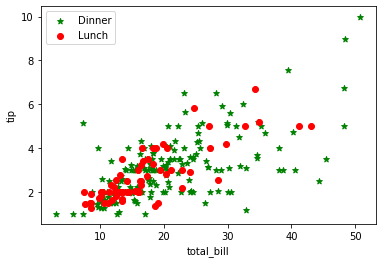

In [ ]:
plt.scatter(j_df[j_df['time'] == 'Dinner']['total_bill'], 
            j_df[j_df['time'] == 'Dinner']['tip'], color='g', marker='*', label='Dinner')

plt.scatter(j_df[j_df['time'] == 'Lunch']['total_bill'], 
            j_df[j_df['time'] == 'Lunch']['tip'], color='r',label='Lunch')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.show()

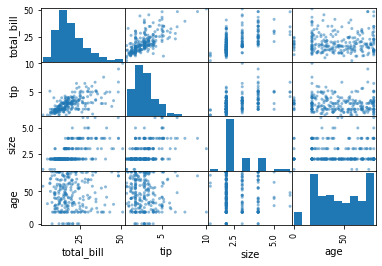

In [ ]:
pd.plotting.scatter_matrix(j_df[['total_bill', 'tip', 'size', 'age']])
plt.show()

## Distributions

In [ ]:
j_df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

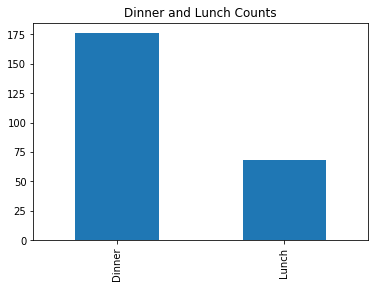

In [ ]:
j_df['time'].value_counts().plot(kind='bar',
                                   title='Dinner and Lunch Counts')
plt.show()

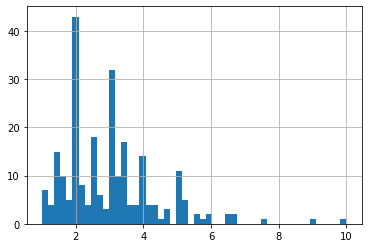

In [ ]:
j_df['tip'].hist(bins=50)
plt.show()

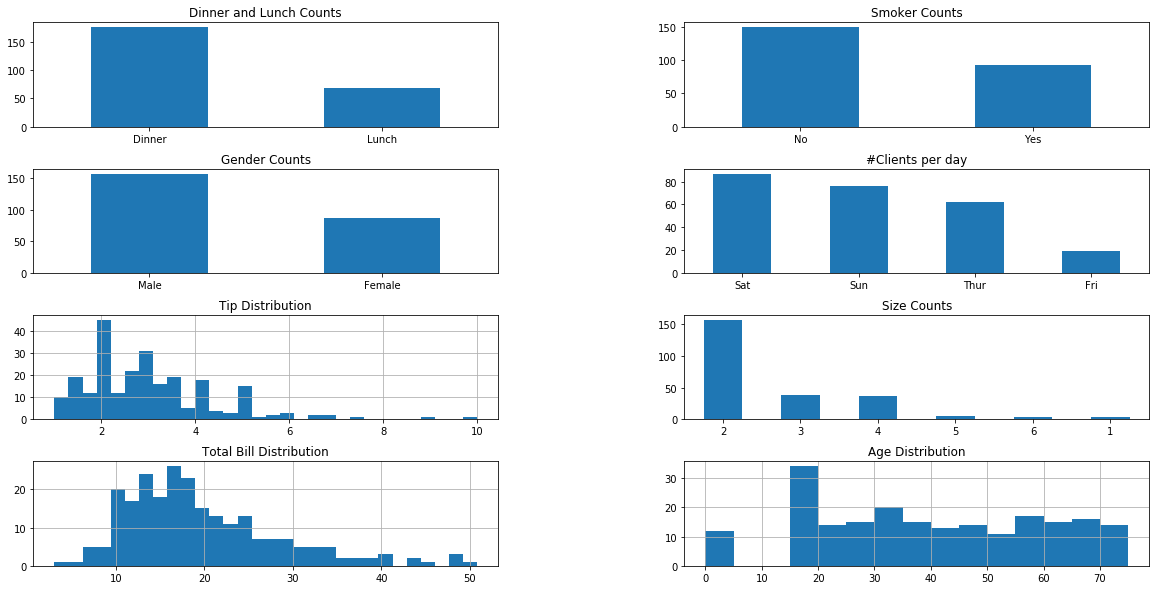

In [ ]:
# Set up a grid of plots:
fig = plt.figure(figsize=(20, 10)) 
fig_dims = (4, 2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot Dinner and Lunch Counts
plt.subplot2grid(fig_dims, (0, 0))
j_df['time'].value_counts().plot(kind='bar',
                                   title='Dinner and Lunch Counts')
plt.xticks(rotation=0)

# Plot smoker Counts
plt.subplot2grid(fig_dims, (0, 1))
j_df['smoker'].value_counts().plot(kind='bar', title='Smoker Counts')
plt.xticks(rotation=0)


# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
j_df['sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot Clients per day
plt.subplot2grid(fig_dims, (1, 1))
df['day'].value_counts().plot(kind='bar', title='#Clients per day')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (2, 0))
j_df['tip'].hist(bins=30, label='Tip Distribution')
plt.title("Tip Distribution")


# Plot Size counts
plt.subplot2grid(fig_dims, (2, 1))
j_df['size'].value_counts().plot(kind='bar', title='Size Counts')
plt.xticks(rotation=0)

# Plot Total Bill distribution
plt.subplot2grid(fig_dims, (3, 0))
j_df['total_bill'].hist(bins=30)
plt.title("Total Bill Distribution")

# Plot Total Bill distribution
plt.subplot2grid(fig_dims, (3, 1))
j_df['age'].hist(bins= np.arange(0,80,5))
plt.title("Age Distribution")

plt.show()

In [ ]:
# sex wrt smoker
smoker_xt = pd.crosstab(j_df['smoker'], j_df['sex'])
smoker_xt

sex,Female,Male
smoker,,
No,53,96
Yes,33,60


In [ ]:
# Normalize the cross tab to sum to 1:
smoker_xt_pct = smoker_xt.div(smoker_xt.sum(1).astype(float), axis=0)
smoker_xt_pct

sex,Female,Male
smoker,,
No,0.355705,0.644295
Yes,0.354839,0.645161


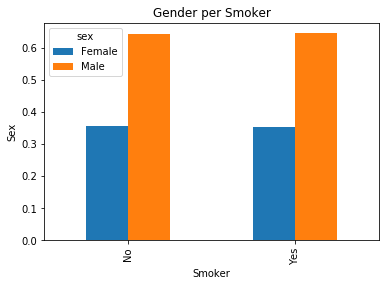

In [ ]:
smoker_xt_pct.plot(kind='bar', stacked=False, 
                   title='Gender per Smoker')
plt.xlabel('Smoker')
plt.ylabel('Sex')
plt.show()

## Replace Missing Values

In [ ]:
# sex
j_df[j_df['smoker'].isnull()]

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
1,16.99,1.01,Female,NaN,Sun,Dinner,2,57
41,16.04,2.24,Male,NaN,Sat,Dinner,3,44


In [ ]:
j_df['sex'].mode()[0]

'Male'

In [ ]:
j_df['sex'] = j_df['sex'].fillna(j_df['sex'].mode()[0])

In [ ]:
j_df['sex'].isnull().sum()

0

In [ ]:
j_df[j_df['age'] == 0] #select the records with age==0

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
4,23.68,3.31,Male,No,Sun,Dinner,2,0
5,24.59,3.61,Female,No,Sun,Dinner,4,0
14,18.43,3.00,Male,No,Sun,Dinner,4,0
28,12.69,2.00,Male,No,Sat,Dinner,2,0
75,14.73,2.20,Female,No,Sat,Dinner,2,0
80,17.29,2.71,Male,No,Thur,Lunch,2,0
81,19.44,3.00,Male,Yes,Thur,Lunch,2,0
88,18.28,4.00,Male,No,Thur,Lunch,2,0
99,21.01,3.00,Male,Yes,Fri,Dinner,2,0


In [ ]:
original_data = j_df.copy()#deep copy, df with zero-values for age
copy = j_df.copy() 
np.median(original_data['age'])

44.0

In [ ]:
j_df.groupby(['time']).median() # replace with the median of the time, numeric_only 

,total_bill,tip,size,age
time,,,,
Dinner,18.390,3.00,2,41
Lunch,15.965,2.25,2,48


In [ ]:
j_df['age'] = j_df.groupby(['time'])['age'].transform(lambda x: 
                                                      x.replace(to_replace=0, method='ffill', value = x.median()))
j_df

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
1,16.99,1.01,Female,NaN,Sun,Dinner,2,57
2,10.34,1.66,Male,No,Sun,Dinner,3,23
3,21.01,3.50,Male,No,Sun,Dinner,3,62
4,23.68,3.31,Male,No,Sun,Dinner,2,41
5,24.59,3.61,Female,No,Sun,Dinner,4,41
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,25
241,27.18,2.00,Female,Yes,Sat,Dinner,2,42
242,22.67,2.00,Male,Yes,Sat,Dinner,2,64


In [ ]:
copy['age']= copy['age'].replace(to_replace=0, method='ffill', value = copy['age'].median())
copy

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
1,16.99,1.01,Female,NaN,Sun,Dinner,2,57
2,10.34,1.66,Male,No,Sun,Dinner,3,23
3,21.01,3.50,Male,No,Sun,Dinner,3,62
4,23.68,3.31,Male,No,Sun,Dinner,2,44
5,24.59,3.61,Female,No,Sun,Dinner,4,44
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,25
241,27.18,2.00,Female,Yes,Sat,Dinner,2,42
242,22.67,2.00,Male,Yes,Sat,Dinner,2,64


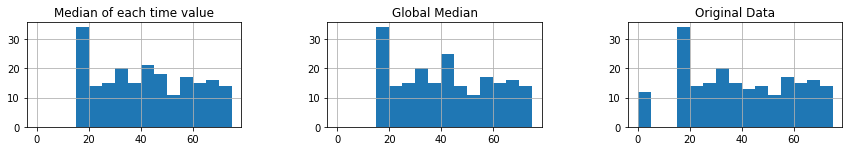

In [ ]:
# Set up a grid of plots:
fig = plt.figure(figsize=(20, 10)) 
fig_dims = (4, 4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# After handling missing values (partion-based approach)
plt.subplot2grid(fig_dims, (0, 0))
j_df['age'].hist(bins=np.arange(0,80,5))
plt.title("Median of each time value")


# After handling missing values (global approach)
plt.subplot2grid(fig_dims, (0, 1))
copy['age'].hist(bins=np.arange(0,80,5))
plt.title("Global Median")

#Before handling missing values
plt.subplot2grid(fig_dims, (0, 2))
original_data['age'].hist(bins=np.arange(0,80,5))
plt.title("Original Data")

plt.show()


['Fri', 'Sat', 'Sun', 'Thur']


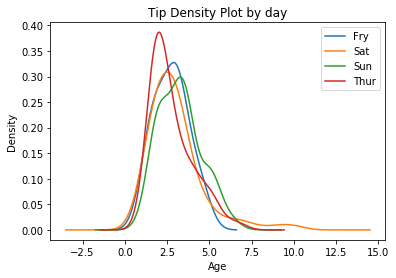

In [ ]:

days = sorted(j_df['day'].unique())
print(days)
for day in days:
    j_df.tip[j_df.day == day].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Tip Density Plot by day')
plt.xlabel('Tipy')
plt.legend(('Fry', 'Sat', 'Sun', 'Thur' ), loc='best')
plt.show()



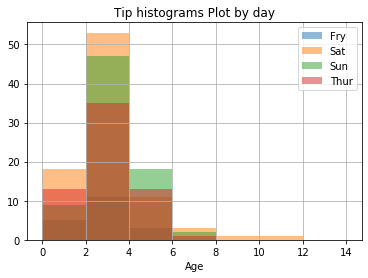

In [ ]:
for day in days:
    j_df[j_df['day'] == day]['tip'].hist(bins=np.arange(0, 15, 2), alpha=0.5)
plt.title('Tip histograms Plot by day')
plt.xlabel('Age')
plt.legend(('Fry', 'Sat', 'Sun', 'Thur' ), loc='best')
plt.show()

## Box plots

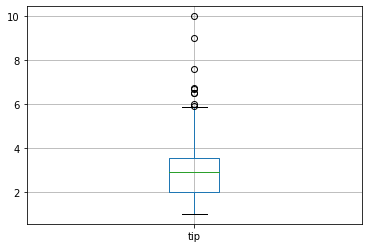

In [ ]:
boxplot = df.boxplot(column=['tip'])
# Outliers to remove: far from distribution 

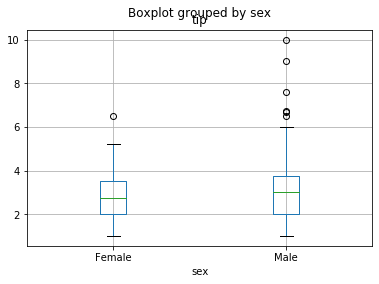

In [ ]:
boxplot = df.boxplot(column=['tip'], by='sex')
# Better to plot in separated boxplots because they can have different  distributions

In [ ]:
 #new column created - percent of tip
j_df["tip_ratio"] = j_df["tip"]/j_df["total_bill"] 

# new column created - sum of total bill and tip
j_df["sum"] = j_df["total_bill"]+j_df["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
j_df["percent"] = round(j_df["tip"]/j_df["sum"]*100, 2)

# add column: bpp - bill per person
j_df["bpp"] = j_df["total_bill"]/j_df["size"]

# add column: tpp - tip per person
j_df["tpp"] = j_df["tip"]/j_df["size"]

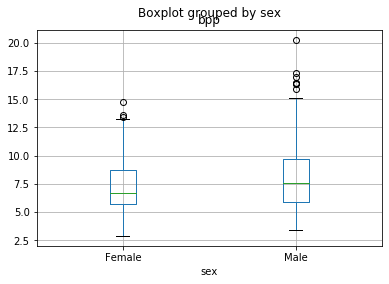

In [ ]:
boxplot = j_df.boxplot(column=['bpp'], by='sex')

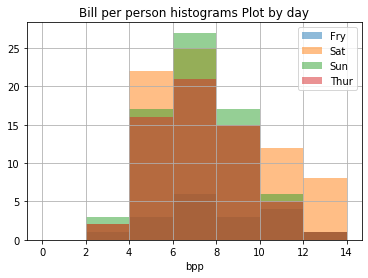

In [ ]:
for day in days:
    j_df[j_df['day'] == day]['bpp'].hist(bins=np.arange(0, 15, 2), alpha=0.5)
plt.title('Bill per person histograms Plot by day')
plt.xlabel('bpp')
plt.legend(('Fry', 'Sat', 'Sun', 'Thur' ), loc='best')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
df_num = j_df.copy()
cat_feature = df_num[['sex','smoker','time','day']]

df_num.drop(columns=cat_feature,inplace=True) 
df_num

,total_bill,tip,size,age,tip_ratio,sum,percent,bpp,tpp
ID,,,,,,,,,
1,16.99,1.01,2,57,0.059447,18.00,5.61,8.495000,0.505000
2,10.34,1.66,3,23,0.160542,12.00,13.83,3.446667,0.553333
3,21.01,3.50,3,62,0.166587,24.51,14.28,7.003333,1.166667
4,23.68,3.31,2,41,0.139780,26.99,12.26,11.840000,1.655000
5,24.59,3.61,4,41,0.146808,28.20,12.80,6.147500,0.902500
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,3,25,0.203927,34.95,16.94,9.676667,1.973333
241,27.18,2.00,2,42,0.073584,29.18,6.85,13.590000,1.000000
242,22.67,2.00,2,64,0.088222,24.67,8.11,11.335000,1.000000


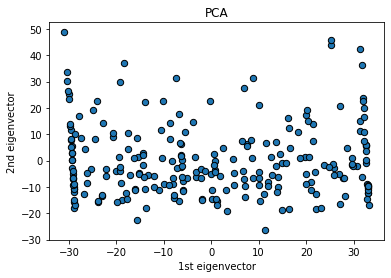

In [ ]:
X_pca = PCA(n_components=2).fit_transform(df_num)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

## Curse of Dimensionality

In [ ]:
from sklearn.decoposition import PCA
df_num = j_df.copy()
cat_feature = df_[['sex','smoker','time','day']]
df_num.drop(columns=cat_feature,inplace=True)

In [ ]:
X_pca = PCA(n_components=2).fit_transform(df_num) #fit_transform: fit the model with X and apply the dimensionality reduction on X.
# Return matrix of int or float, shape (n_samples, n_components), better to plot

In [ ]:
plt.scatter(X_pca[:0], X_pca[:,1], edgecolor='k', s=40)
#todo: put labels


## Visualization of geographical data
Used a different ds of coordinates

In [ ]:
loc_df = read_csv('data/year....csv', sep='\t', index_col=0)
loc_df.index += 1 #insert a numerical index, starting from 1
loc_df.indez.name = 'ID'

In [ ]:
geo_df = pd.concat([j_df, loc_df], axis=1, join='outer') #join the two df, inner join

In [ ]:
## Visualize it
import plotly.express as px

In [ ]:
color_scale = [(0, 'orange'), (1, 'red')]

In [ ]:
fig = px.scatter_mapbox(geo_df, 
                        lat="latitude", 
                        lon="longitude", 
                        color="tip", 
                        hover_name='day',
                        hover_data=['city','total_bill', 'tip', 'size'],
                        color_continuous_scale=color_scale,
                        size="total_bill", #size can be parametrical, accorded to the value
                        zoom=3,
                        height=800,
                        width=800) 
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()